In [88]:
import pandas as pd
import re

In [89]:
df=pd.read_csv('data.csv')

In [90]:
df1=pd.DataFrame(df,columns=['Name','Wage','Value'])

In [125]:
df1 = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1['Wage'].replace(['\€'], '', regex=True).apply(value_to_float)
value = df1['Value'].replace(['\€'], '', regex=True).apply(value_to_float)

df1['Wage'] = wage
df1['Value'] = value

df1['difference'] = df1['Value'] - df1['Wage']
df1.sort_values('difference',ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,1000.0,0.0,-1000.0
12192,H. Sulaimani,3000.0,0.0,-3000.0
3550,S. Nakamura,4000.0,0.0,-4000.0
4228,B. Nivet,5000.0,0.0,-5000.0


In [97]:
import seaborn as sns

In [98]:
sns.set()

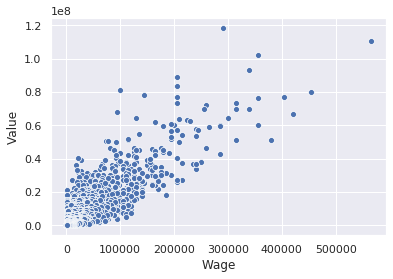

In [101]:
graph=sns.scatterplot(x='Wage',y='Value',data=df1)

In [119]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool
TOOLTIPS= HoverTool(tooltips=[
        ('index','$index'),
         ("(Wage,Value)","(@Wage,@Value)"),
         ('Name','@Name')]
                   )

In [120]:
p=figure(title='Soccer plot',x_axis_label="Wage",y_axis_label="Value",plot_width=1000,plot_height=1000,tools=[TOOLTIPS])

In [121]:
p.circle('Wage',"Value",source=df1)

GlyphRenderer(id='1432', ...)

In [122]:
show(p)